# Tensorflow Linear Regression

TensorFlow was created by Google Brain and is used for doing machine learning in neural networks. On the other hand, to use deep learning approaches, you will need large data to train. If not enough data, the model will be overfitting. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2007-01-01'
end = '2018-11-01'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,20.080000,20.400000,19.350000,19.520000,19.520000,28350300
2007-01-04,19.660000,19.860001,19.320000,19.790001,19.790001,23652500
2007-01-05,19.540001,19.910000,19.540001,19.709999,19.709999,15902400
2007-01-08,19.709999,19.860001,19.370001,19.469999,19.469999,15814800
2007-01-09,19.450001,19.709999,19.370001,19.650000,19.650000,14494200


In [3]:
dataset['Increase_Decrease'] = np.where(dataset['Volume'].shift(-1) > dataset['Volume'],1,0)
dataset['Buy_Sell_on_Open'] = np.where(dataset['Open'].shift(-1) > dataset['Open'],1,0)
dataset['Buy_Sell'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'],1,0)
dataset['Returns'] = dataset['Adj Close'].pct_change()
dataset = dataset.dropna()
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
Date,,,,,,,,,,
2007-01-04,19.660000,19.860001,19.320000,19.790001,19.790001,23652500,0,0,0,0.013832
2007-01-05,19.540001,19.910000,19.540001,19.709999,19.709999,15902400,0,1,0,-0.004043
2007-01-08,19.709999,19.860001,19.370001,19.469999,19.469999,15814800,0,0,1,-0.012177
2007-01-09,19.450001,19.709999,19.370001,19.650000,19.650000,14494200,1,1,1,0.009245
2007-01-10,19.639999,20.020000,19.500000,20.010000,20.010000,19783200,1,1,1,0.018321


In [4]:
dataset.shape

(2980, 10)

In [5]:
import tensorflow as tf

import numpy as np

print(tf.__version__)

1.9.0


In [6]:
features = np.array(dataset[['Open','Returns']])
target = np.array(dataset['Adj Close'])

In [7]:
def feature_normalize(dataset):    
    mu = np.mean(dataset,axis=0)
    std = np.std(dataset,axis=0)
    return (dataset - mu)/std

In [8]:
def append_bias(features,target):
    n_samples = features.shape[0]
    n_features = features.shape[1]
    intercept_feature = np.ones((n_samples,1))
    X = np.concatenate((features,intercept_feature),axis=1)
    X = np.reshape(X,[n_samples,n_features +1])
    Y = np.reshape(target,[n_samples,1])
    return X,Y

In [9]:
z_features = feature_normalize(features)
X_input,Y_input = append_bias(z_features,target)
num_features = X_input.shape[1]

In [10]:
# Create TensorFlow ops for placeholders, weights, and weight initialization
X = tf.placeholder(tf.float32,[None,num_features])
Y = tf.placeholder(tf.float32,[None,1])
w = tf.Variable(tf.random_normal((num_features,1)),name='weights')
init = tf.global_variables_initializer()

In [11]:
# Define the hyperparameters of the model, the Learning Rate and the number of Epochs.
learning_rate = 0.01
num_epochs = 1000
cost_trace = []
pred = tf.matmul(X,w)
error = pred - Y
cost = tf.reduce_mean(tf.square(error))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [12]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(num_epochs):
        sess.run(train_op,feed_dict={X:X_input,Y:Y_input})
        cost_trace.append(sess.run(cost,feed_dict={X:X_input,Y:Y_input}))
    error_ = sess.run(error,{X:X_input,Y:Y_input})
    pred_ = sess.run(pred,{X:X_input})
print('MSE in training:',cost_trace[-1])

MSE in training: 0.041643593


Text(0.5,1,'Cost (MSE) versus Epochs while training')

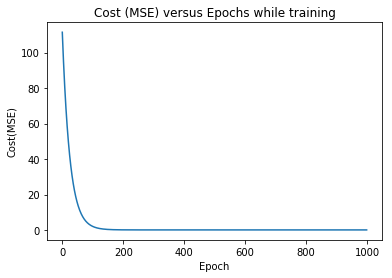

In [13]:
plt.plot(cost_trace)
plt.xlabel('Epoch')
plt.ylabel('Cost(MSE)')
plt.title('Cost (MSE) versus Epochs while training')

Text(0.5,1,'Liner Regression')

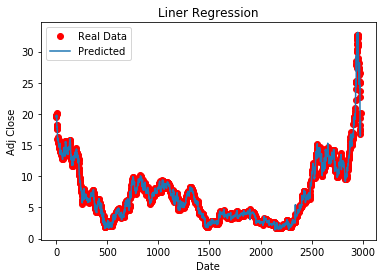

In [14]:
plt.plot(target, 'ro', label='Real Data')
plt.plot(pred_, label='Predicted')
plt.xlabel('Date') 
plt.ylabel('Adj Close')
plt.legend()
plt.title('Liner Regression')